# task 3

In [4]:
#reading the file
import pandas as pd
data = pd.read_csv("heart.csv")
data

,Age,Sex,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,HeartDisease
0,40,M,140,289,0,Normal,172,N,0.0,Up,0
1,49,F,160,180,0,Normal,156,N,1.0,Flat,1
2,37,M,130,283,0,ST,98,N,0.0,Up,0
3,48,F,138,214,0,Normal,108,Y,1.5,Flat,1
4,54,M,150,195,0,Normal,122,N,0.0,Up,0
...,...,...,...,...,...,...,...,...,...,...,...
913,45,M,110,264,0,Normal,132,N,1.2,Flat,1
914,68,M,144,193,1,Normal,141,N,3.4,Flat,1
915,57,M,130,131,0,Normal,115,Y,1.2,Flat,1
916,57,F,130,236,0,LVH,174,N,0.0,Flat,1


<Axes: >

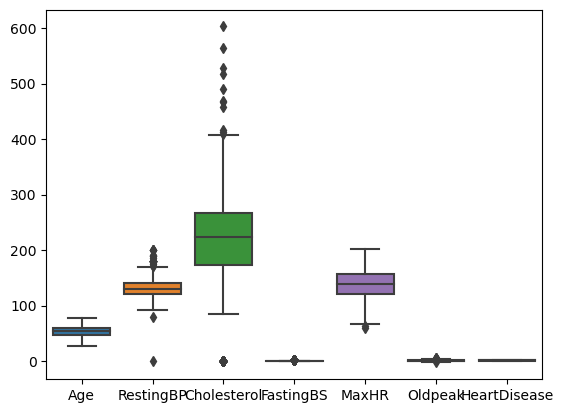

In [5]:
#drawing the boxplot
import seaborn as sns
sns.boxplot(data)

# task 4

In [6]:
#getting data
data.head()

,Age,Sex,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,HeartDisease
0,40,M,140,289,0,Normal,172,N,0.0,Up,0
1,49,F,160,180,0,Normal,156,N,1.0,Flat,1
2,37,M,130,283,0,ST,98,N,0.0,Up,0
3,48,F,138,214,0,Normal,108,Y,1.5,Flat,1
4,54,M,150,195,0,Normal,122,N,0.0,Up,0


In [26]:
#encoding the catagorical data into numerical data
from sklearn.preprocessing import OneHotEncoder, LabelEncoder
from sklearn.compose import ColumnTransformer
encoder = LabelEncoder()

In [35]:
#encoding the catagorical data into numerical data
s = data["Sex"]
data["Sex"] = encoder.fit_transform(s)

r = data["RestingECG"]
data["RestingECG"] = encoder.fit_transform(r)

e = data["ExerciseAngina"]
data["ExerciseAngina"] = encoder.fit_transform(e)

st = data["ST_Slope"]
data["ST_Slope"] = encoder.fit_transform(st)

In [38]:
data.head()

,Age,Sex,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,HeartDisease
0,40,1,140,289,0,1,172,0,0.0,2,0
1,49,0,160,180,0,1,156,0,1.0,1,1
2,37,1,130,283,0,2,98,0,0.0,2,0
3,48,0,138,214,0,1,108,1,1.5,1,1
4,54,1,150,195,0,1,122,0,0.0,2,0


In [41]:
#spliting the data into x and y
x = data.drop("HeartDisease", axis = 1)
y = data["HeartDisease"]

In [43]:
x.head(),  y.head()

(   Age  Sex  RestingBP  Cholesterol  FastingBS  RestingECG  MaxHR  \
 0   40    1        140          289          0           1    172   
 1   49    0        160          180          0           1    156   
 2   37    1        130          283          0           2     98   
 3   48    0        138          214          0           1    108   
 4   54    1        150          195          0           1    122   
 
    ExerciseAngina  Oldpeak  ST_Slope  
 0               0      0.0         2  
 1               0      1.0         1  
 2               0      0.0         2  
 3               1      1.5         1  
 4               0      0.0         2  ,
 0    0
 1    1
 2    0
 3    1
 4    0
 Name: HeartDisease, dtype: int64)

In [46]:
#spliting the data into train and test
from sklearn.model_selection import train_test_split
import numpy as np

In [47]:
np.random.seed(42)
x_train, x_test, y_train, y_test = train_test_split(x,y,test_size = 0.2)

In [48]:
x_train.shape, x_test.shape, y_train.shape, y_test.shape

((734, 10), (184, 10), (734,), (184,))

In [50]:
#importing the model 
from sklearn.ensemble import RandomForestRegressor

In [69]:
#fitting the data into model
model = RandomForestRegressor(n_estimators=45)
model.fit(x_train, y_train)

RandomForestRegressor(n_estimators=45)

In [70]:
#checking the score of training data
model.score(x_train, y_train)#

0.930900868541951

In [72]:
#checking the score of testing data
model.score(x_test, y_test)

0.5320036142466049

In [68]:
#checking at which value of estimator the score will be maximum
np.random.seed(32)
for i in range(1,100,1):
    print(f"Tring model with {i} estimators ...")
    model = RandomForestRegressor(n_estimators = i).fit(x_train, y_train)
    print(f"Model accuracy on test set: {model.score(x_test, y_test) * 100: 2f}%")
    print("")

Tring model with 1 estimators ...
Model accuracy on test set:  12.902051%

Tring model with 2 estimators ...
Model accuracy on test set:  36.909819%

Tring model with 3 estimators ...
Model accuracy on test set:  47.393832%

Tring model with 4 estimators ...
Model accuracy on test set:  38.026460%

Tring model with 5 estimators ...
Model accuracy on test set:  51.493142%

Tring model with 6 estimators ...
Model accuracy on test set:  52.170571%

Tring model with 7 estimators ...
Model accuracy on test set:  46.173376%

Tring model with 8 estimators ...
Model accuracy on test set:  50.937614%

Tring model with 9 estimators ...
Model accuracy on test set:  51.612251%

Tring model with 10 estimators ...
Model accuracy on test set:  49.371526%

Tring model with 11 estimators ...
Model accuracy on test set:  48.874482%

Tring model with 12 estimators ...
Model accuracy on test set:  53.240685%

Tring model with 13 estimators ...
Model accuracy on test set:  48.872407%

Tring model with 14 e

In [73]:
from sklearn.metrics import accuracy_score

In [82]:
y_predict = model.predict(x_train)

In [80]:
y_predict

array([0.13333333, 0.75555556, 0.95555556, 0.93333333, 0.15555556,
       0.55555556, 0.75555556, 0.06666667, 0.55555556, 0.95555556,
       0.62222222, 0.06666667, 0.37777778, 0.17777778, 0.88888889,
       0.95555556, 0.13333333, 0.62222222, 0.44444444, 0.37777778,
       1.        , 0.75555556, 0.        , 0.51111111, 0.75555556,
       0.86666667, 0.        , 0.88888889, 0.02222222, 0.        ,
       0.91111111, 0.        , 0.88888889, 0.91111111, 0.88888889,
       0.44444444, 1.        , 0.        , 0.82222222, 0.86666667,
       0.6       , 0.97777778, 0.57777778, 0.        , 0.08888889,
       0.62222222, 0.68888889, 0.75555556, 0.95555556, 0.71111111,
       0.11111111, 0.        , 0.97777778, 1.        , 0.28888889,
       0.11111111, 0.13333333, 0.82222222, 0.57777778, 0.73333333,
       0.4       , 0.04444444, 0.        , 0.93333333, 0.24444444,
       0.97777778, 1.        , 0.95555556, 1.        , 0.33333333,
       0.6       , 0.        , 0.93333333, 0.71111111, 0.     

# task 2

In [139]:
matrix = []
for i in range(8):
    row = []
    for j in range(8):
        if (i + j) % 2 == 0:
            row.append(1)
        else:
            row.append(0)
    matrix.append(row)



matrix

[[1, 0, 1, 0, 1, 0, 1, 0],
 [0, 1, 0, 1, 0, 1, 0, 1],
 [1, 0, 1, 0, 1, 0, 1, 0],
 [0, 1, 0, 1, 0, 1, 0, 1],
 [1, 0, 1, 0, 1, 0, 1, 0],
 [0, 1, 0, 1, 0, 1, 0, 1],
 [1, 0, 1, 0, 1, 0, 1, 0],
 [0, 1, 0, 1, 0, 1, 0, 1]]

# task 1

In [138]:
for i in range(5):
    for j in range(5):
        if j == 0 or j == 4 or (i == j and i >= 2) or (i == 3 and j == 1):
            print("**", end=" ")
        else:
            print("  ", end=" ")
    print()


**          ** 
**          ** 
**    **    ** 
** **    ** ** 
**          ** 


# task 5

working of the model
1. first we read the file, using pandas
2. we saw that if the data is catagorical or numerical, i see that out target is in numerical, so i prefer the RandomForestRegressor
3. but there a problem, 😑, regressing expects the numerical data as input
4. so to overcome the problem we will use the labelencoder to convert the catagorical data into numerical
4. after converting the data we seperated the x and y, features and labels
6. then we use the seperate the data inot train and test 
7. now we import out model and fit the data onto it
8. after fitting the data, i saw at what estimator value the score will be maximun so we can get the high accuracy score
